## Tiltmeter Mindanao Event

### Import Libraries

In [1]:
import os
import obspy
import matplotlib.pyplot as plt
import pandas as pd

from numpy import arange, linspace, sqrt, diff, nan, gradient, nanmax, mean
from pandas import read_csv, DataFrame

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from numpy.ma import filled, isMaskedArray, masked
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from obspy import UTCDateTime
from pathlib import Path

from andbro__querrySeismoData import __querrySeismoData
from andbro__get_seconds import __get_seconds
from andbro__readYaml import __readYaml
from andbro__get_timeaxis import __get_timeaxis

from functions.converstion_to_tilt import __conversion_to_tilt

import warnings
warnings.filterwarnings('ignore')

In [2]:
if os.uname().nodename == 'lighthouse':
    root_path = '/home/andbro/'
    data_path = '/home/andbro/kilauea-data/'
    archive_path = '/home/andbro/freenas/'
    bay_path = '/home/andbro/bay200/'
elif os.uname().nodename == 'kilauea':
    root_path = '/home/brotzer/'
    data_path = '/import/kilauea-data/'
    archive_path = '/import/freenas-ffb-01-data/'
    bay_path = '/bay200/'
elif os.uname().nodename == 'lin-ffb-01':
    root_path = '/home/brotzer/'
    data_path = '/import/kilauea-data/'
    archive_path = '/import/freenas-ffb-01-data/'
    bay_path = '/bay200/'

### Configurations

In [3]:
## configurations
config = {}

config['save'] = False

config['tbeg'] = UTCDateTime("2023-12-02 14:37")
config['tend'] = UTCDateTime("2023-12-02 16:37")


config['name'] = 'tiltmeter'
config['set_filter'] = 'n'

## specify path to SDS data archive
config['path_to_data'] = archive_path+"romy_archive/"

config['path_to_figs'] = root_path+"Documents/ROMY/tiltmeter/figures/"

## tiltmeter configurations
confTilt = __readYaml(f"{root_path}Documents/ROMY/tiltmeter/", "tiltmeter.conf")

## correction of offset (e.g. reset mass)
offset_correction = __readYaml(f"{root_path}Documents/ROMY/tiltmeter/", "tiltmeter_steps.yml")

## correction for temperature trends
## based on MAT
temperature_correction = __readYaml(f"{root_path}Documents/ROMY/tiltmeter/", "tiltmeter_temperature_correction.yml")

## based on WSX
temperature_correction = __readYaml(f"{root_path}Documents/ROMY/tiltmeter/", "temperature_correction_new.yml")



In [4]:
def __correct_temperature_trend(st, correction):

    st0 = st.copy()
    temperature = st0.select(channel="*T")[0].data

#     st0.select(channel="*N")[0].data -= (correction['N_slope']* temperature + correction['N_intercept'])
#     st0.select(channel="*E")[0].data -= (correction['E_slope']* temperature + correction['N_intercept'])
    st0.select(channel="*N")[0].data -= (correction['N_slope']* temperature)
    st0.select(channel="*E")[0].data -= (correction['E_slope']* temperature)

    return st0

### Load Tiltmeter Data

In [5]:
from andbro__read_sds import __read_sds

In [6]:
TROMY0 = __read_sds(config['path_to_data'], "BW.TROMY..MA*", config['tbeg']-100, config['tend']+100)


TROMY0.sort();
TROMY0.detrend("linear");

TROMY0 = TROMY0.filter("lowpass", freq=0.5, corners=4, zerophase=True);

TROMY0.decimate(5, no_filter=True);
TROMY0.merge();
TROMY0.trim(config['tbeg'], config['tend']);

print(TROMY0)

TROMY = __conversion_to_tilt(TROMY0, confTilt['TROMY'])

# TROMY2 = __correct_temperature_trend(TROMY, temperature_correction['TROMY'])

# for tr in TROMY2:
#     tr.data *= -9.81 # m/s^2

for tr in TROMY:
    tr.data *= -9.81 # m/s^2




3 Trace(s) in Stream:
BW.TROMY..MAE | 2023-12-02T14:35:19.915000Z - 2023-12-02T16:38:39.915000Z | 5.0 Hz, 37001 samples
BW.TROMY..MAN | 2023-12-02T14:35:19.915000Z - 2023-12-02T16:38:39.915000Z | 5.0 Hz, 37001 samples
BW.TROMY..MAT | 2023-12-02T14:35:19.915000Z - 2023-12-02T16:38:39.915000Z | 5.0 Hz, 37001 samples

3 Trace(s) in Stream:
BW.TROMY..MAE | 2023-12-02T14:35:19.915000Z - 2023-12-02T16:38:39.915000Z | 5.0 Hz, 37001 samples
BW.TROMY..MAN | 2023-12-02T14:35:19.915000Z - 2023-12-02T16:38:39.915000Z | 5.0 Hz, 37001 samples
BW.TROMY..MAT | 2023-12-02T14:35:19.915000Z - 2023-12-02T16:38:39.915000Z | 5.0 Hz, 37001 samples

3 Trace(s) in Stream:
BW.TROMY..MAE | 2023-12-02T14:35:19.915000Z - 2023-12-02T16:38:39.915000Z | 1.0 Hz, 7401 samples
BW.TROMY..MAN | 2023-12-02T14:35:19.915000Z - 2023-12-02T16:38:39.915000Z | 1.0 Hz, 7401 samples
BW.TROMY..MAT | 2023-12-02T14:35:19.915000Z - 2023-12-02T16:38:39.915000Z | 1.0 Hz, 7401 samples

3 Trace(s) in Stream:
BW.TROMY..MAE | 2023-12-02T14:35:19.915000Z - 2023-12-02T16:38:39.915000Z | 1.0 Hz, 7401 samples
BW.TROMY..MAN | 2023-12-02T14:35:19.915000Z - 2023-12-02T16:38:39.915000Z | 1.0 Hz, 7401 samples
BW.TROMY..MAT | 2023-12-02T14:35:19.915000Z - 2023-12-02T16:38:39.915000Z | 1.0 Hz, 7401 samples

3 Trace(s) in Stream:
BW.TROMY..MAE | 2023-12-02T14:36:59.915000Z - 2023-12-02T16:36:59.915000Z | 1.0 Hz, 7201 samples
BW.TROMY..MAN | 2023-12-02T14:36:59.915000Z - 2023-12-02T16:36:59.915000Z | 1.0 Hz, 7201 samples
BW.TROMY..MAT | 2023-12-02T14:36:59.915000Z - 2023-12-02T16:36:59.915000Z | 1.0 Hz, 7201 samples

3 Trace(s) in Stream:
BW.TROMY..MAE | 2023-12-02T14:36:59.915000Z - 2023-12-02T16:36:59.915000Z | 1.0 Hz, 7201 samples
BW.TROMY..MAN | 2023-12-02T14:36:59.915000Z - 2023-12-02T16:36:59.915000Z | 1.0 Hz, 7201 samples
BW.TROMY..MAT | 2023-12-02T14:36:59.915000Z - 2023-12-02T16:36:59.915000Z | 1.0 Hz, 7201 samples
  -> converted data of TROMY


In [7]:
BROMY0 = __read_sds(config['path_to_data'], "BW.DROMY..LA*", config['tbeg']-100, config['tend']+100)

BROMY0.sort()
BROMY0.detrend("linear");

BROMY0 = BROMY0.filter("lowpass", freq=0.5, corners=4, zerophase=True);

BROMY0.decimate(2, no_filter=True);
BROMY0.decimate(2, no_filter=True);
BROMY0.decimate(5, no_filter=True);
BROMY0.decimate(2, no_filter=True);
BROMY0.decimate(5, no_filter=True);

BROMY0.merge();

BROMY0.trim(config['tbeg'], config['tend']);

BROMY = __conversion_to_tilt(BROMY0, confTilt['BROMY'])

for tr in BROMY:
    tr.data *= -9.81 # m/s^2


3 Trace(s) in Stream:
BW.DROMY..LAE | 2023-12-02T14:35:20.000000Z - 2023-12-02T16:38:40.000000Z | 200.0 Hz, 1480001 samples
BW.DROMY..LAN | 2023-12-02T14:35:20.000000Z - 2023-12-02T16:38:40.000000Z | 200.0 Hz, 1480001 samples
BW.DROMY..LAT | 2023-12-02T14:35:20.000000Z - 2023-12-02T16:38:40.000000Z | 200.0 Hz, 1480001 samples

3 Trace(s) in Stream:
BW.DROMY..LAE | 2023-12-02T14:35:20.000000Z - 2023-12-02T16:38:40.000000Z | 200.0 Hz, 1480001 samples
BW.DROMY..LAN | 2023-12-02T14:35:20.000000Z - 2023-12-02T16:38:40.000000Z | 200.0 Hz, 1480001 samples
BW.DROMY..LAT | 2023-12-02T14:35:20.000000Z - 2023-12-02T16:38:40.000000Z | 200.0 Hz, 1480001 samples

3 Trace(s) in Stream:
BW.DROMY..LAE | 2023-12-02T14:35:20.000000Z - 2023-12-02T16:38:40.000000Z | 100.0 Hz, 740001 samples
BW.DROMY..LAN | 2023-12-02T14:35:20.000000Z - 2023-12-02T16:38:40.000000Z | 100.0 Hz, 740001 samples
BW.DROMY..LAT | 2023-12-02T14:35:20.000000Z - 2023-12-02T16:38:40.000000Z | 100.0 Hz, 740001 samples

3 Trace(s) in Stream:
BW.DROMY..LAE | 2023-12-02T14:35:20.000000Z - 2023-12-02T16:38:40.000000Z | 50.0 Hz, 370001 samples
BW.DROMY..LAN | 2023-12-02T14:35:20.000000Z - 2023-12-02T16:38:40.000000Z | 50.0 Hz, 370001 samples
BW.DROMY..LAT | 2023-12-02T14:35:20.000000Z - 2023-12-02T16:38:40.000000Z | 50.0 Hz, 370001 samples

3 Trace(s) in Stream:
BW.DROMY..LAE | 2023-12-02T14:35:20.000000Z - 2023-12-02T16:38:40.000000Z | 10.0 Hz, 74001 samples
BW.DROMY..LAN | 2023-12-02T14:35:20.000000Z - 2023-12-02T16:38:40.000000Z | 10.0 Hz, 74001 samples
BW.DROMY..LAT | 2023-12-02T14:35:20.000000Z - 2023-12-02T16:38:40.000000Z | 10.0 Hz, 74001 samples

3 Trace(s) in Stream:
BW.DROMY..LAE | 2023-12-02T14:35:20.000000Z - 2023-12-02T16:38:40.000000Z | 5.0 Hz, 37001 samples
BW.DROMY..LAN | 2023-12-02T14:35:20.000000Z - 2023-12-02T16:38:40.000000Z | 5.0 Hz, 37001 samples
BW.DROMY..LAT | 2023-12-02T14:35:20.000000Z - 2023-12-02T16:38:40.000000Z | 5.0 Hz, 37001 samples

3 Trace(s) in Stream:
BW.DROMY..LAE | 2023-12-02T14:35:20.000000Z - 2023-12-02T16:38:40.000000Z | 1.0 Hz, 7401 samples
BW.DROMY..LAN | 2023-12-02T14:35:20.000000Z - 2023-12-02T16:38:40.000000Z | 1.0 Hz, 7401 samples
BW.DROMY..LAT | 2023-12-02T14:35:20.000000Z - 2023-12-02T16:38:40.000000Z | 1.0 Hz, 7401 samples

3 Trace(s) in Stream:
BW.DROMY..LAE | 2023-12-02T14:35:20.000000Z - 2023-12-02T16:38:40.000000Z | 1.0 Hz, 7401 samples
BW.DROMY..LAN | 2023-12-02T14:35:20.000000Z - 2023-12-02T16:38:40.000000Z | 1.0 Hz, 7401 samples
BW.DROMY..LAT | 2023-12-02T14:35:20.000000Z - 2023-12-02T16:38:40.000000Z | 1.0 Hz, 7401 samples

3 Trace(s) in Stream:
BW.DROMY..LAE | 2023-12-02T14:37:00.000000Z - 2023-12-02T16:37:00.000000Z | 1.0 Hz, 7201 samples
BW.DROMY..LAN | 2023-12-02T14:37:00.000000Z - 2023-12-02T16:37:00.000000Z | 1.0 Hz, 7201 samples
BW.DROMY..LAT | 2023-12-02T14:37:00.000000Z - 2023-12-02T16:37:00.000000Z | 1.0 Hz, 7201 samples

  -> converted data of DROMY


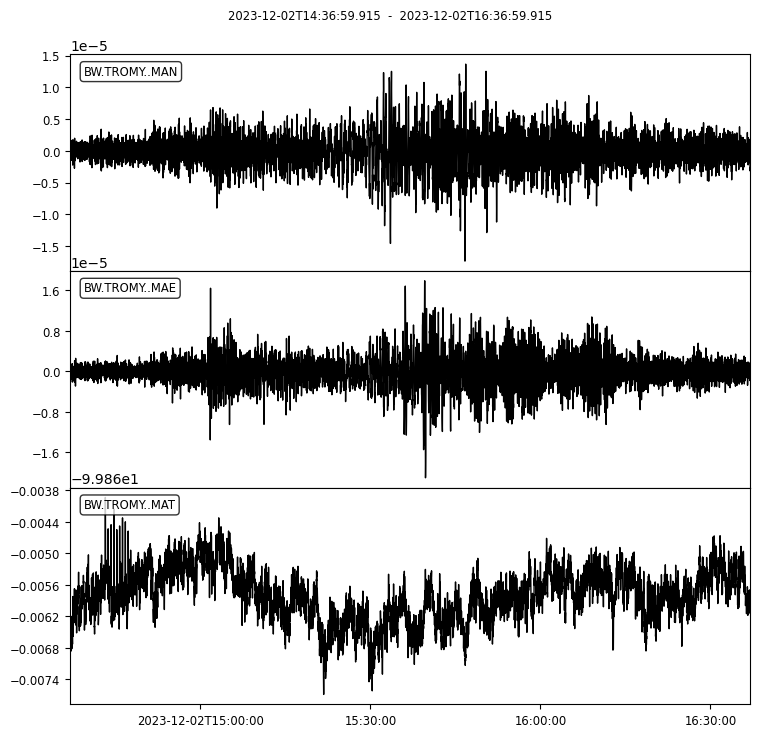

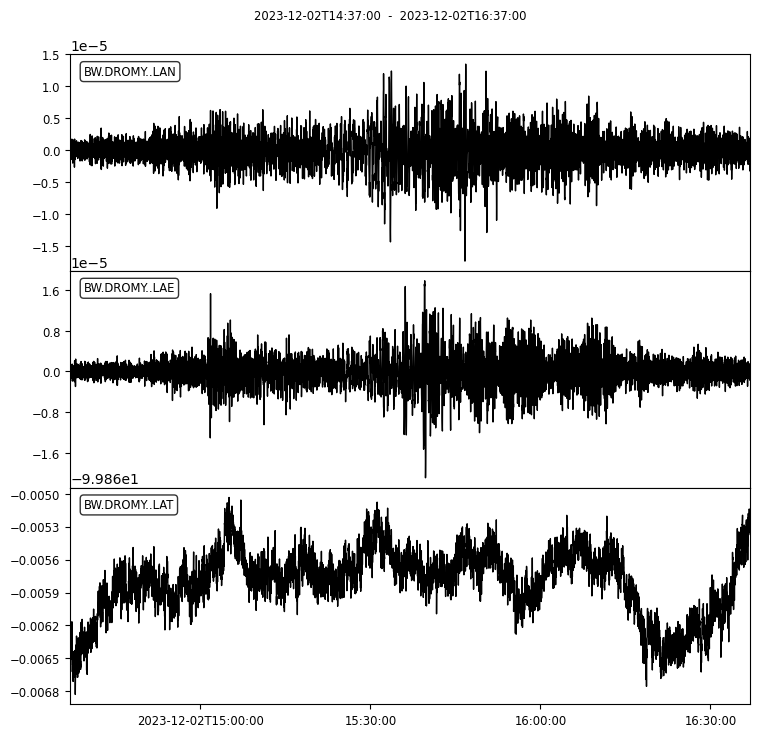

In [8]:
TROMY.plot(equal_scale=False);
BROMY.plot(equal_scale=False);

2 Trace(s) in Stream:
GR.FUR..BHN | 2023-12-02T14:36:59.990000Z - 2023-12-02T16:36:59.990000Z | 1.0 Hz, 7201 samples
GR.FUR..BHE | 2023-12-02T14:36:59.989999Z - 2023-12-02T16:36:59.989999Z | 1.0 Hz, 7201 samples


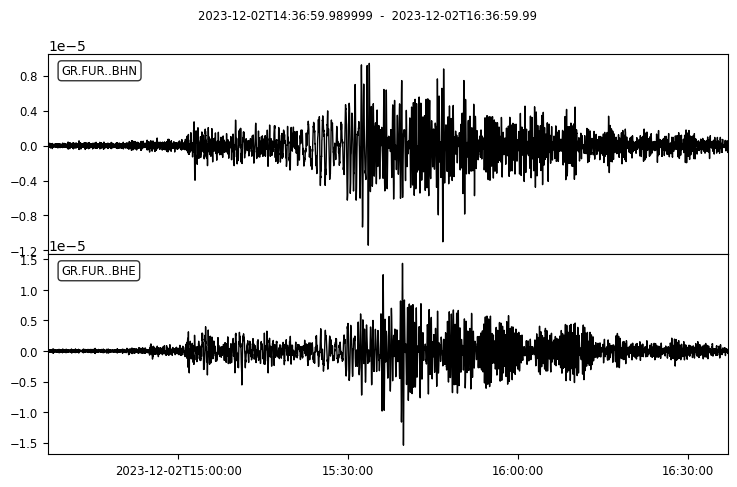

In [9]:
from andbro__read_sds import __read_sds
from obspy import read_inventory

inv_fur = read_inventory(root_path+"Documents/ROMY/stationxml_ringlaser/dataless.seed.GR_FUR")

fur =  __read_sds(bay_path+"mseed_online/archive/", "GR.FUR..BHN", config['tbeg']-100, config['tend']+100)
fur += __read_sds(bay_path+"mseed_online/archive/", "GR.FUR..BHE", config['tbeg']-100, config['tend']+100)


fur = fur.remove_response(inv_fur, output='ACC', water_level=10)

fur = fur.filter("lowpass", freq=0.5, corners=4, zerophase=True);

fur = fur.decimate(2, no_filter=True);
fur = fur.decimate(5, no_filter=True);
fur = fur.decimate(2, no_filter=True);

fur = fur.trim(config['tbeg'], config['tend']);

print(fur)

fur.plot(equal_scale=False);

## Plotting

In [10]:
def __makeplot_waveform_comparison(st1, st2):

    fig, ax = plt.subplots(2, 1, figsize=(15, 5), sharex=True)

    font = 14

    rot_scaling = 1e6

    lw = 1

    ax[0].plot(st1.select(channel="*N")[0].times(), st1.select(channel="*N")[0].data*rot_scaling, lw=lw, 
               label=f"{st1.select(channel='*N')[0].stats.station}.{st1.select(channel='*N')[0].stats.channel}", color="darkred", ls="-", zorder=3)
    ax[0].plot(st2.select(channel="*N")[0].times(), st2.select(channel="*N")[0].data*rot_scaling, lw=lw, 
               label=f"{st1.select(channel='*N')[0].stats.station}.{st1.select(channel='*N')[0].stats.channel}", color="black", zorder=2)

    ax[1].plot(st1.select(channel="*E")[0].times(), st1.select(channel="*E")[0].data*rot_scaling, lw=lw,
               label=f"{st1.select(channel='*N')[0].stats.station}.{st1.select(channel='*N')[0].stats.channel}", color="darkred", ls="-", zorder=3)
    ax[1].plot(st2.select(channel="*E")[0].times(), st2.select(channel="*E")[0].data*rot_scaling, lw=lw,
               label=f"{st1.select(channel='*N')[0].stats.station}.{st1.select(channel='*N')[0].stats.channel}", color="black", zorder=2)

    ax11 = ax[0].twinx()
    diff_N = ( abs(st1.select(channel="*N")[0].data - st2.select(channel="*N")[0].data)*rot_scaling )
    ax11.fill_between(st2.select(channel="*N")[0].times(), diff_N, color="grey", alpha=0.5, zorder=1)
    # ax11.set_ylim(-1, 10)
    ax11.set_ylabel("$\Delta$ a ($\mu$m/s$^2$)", color="darkgrey")

    ax22 = ax[1].twinx()
    diff_E = ( abs(st1.select(channel="*E")[0].data - st2.select(channel="*E")[0].data)*rot_scaling )
    ax22.fill_between(st2.select(channel="*E")[0].times(), diff_E, color="grey", alpha=0.5, zorder=1)
    # ax22.set_ylim(-1, 10)
    ax22.set_ylabel("$\Delta$ a ($\mu$m/s$^2$)", color="darkgrey")

    for i in range(2):
        ax[i].legend(loc=1, ncols=4)
        ax[i].grid(which="both", alpha=0.5)
        # ax[i].set_xscale("log")
        ax[i].set_ylabel(r"a ($\mu$m/s$^2$)")

    ax[1].set_xlabel("Time (s)")
    ax[0].set_title(f"{config['tbeg'].date} {str(config['tbeg'].time).split('.')[0]} UTC | {config['fmin']}-{config['fmax']} Hz ")

    plt.show();
    return fig

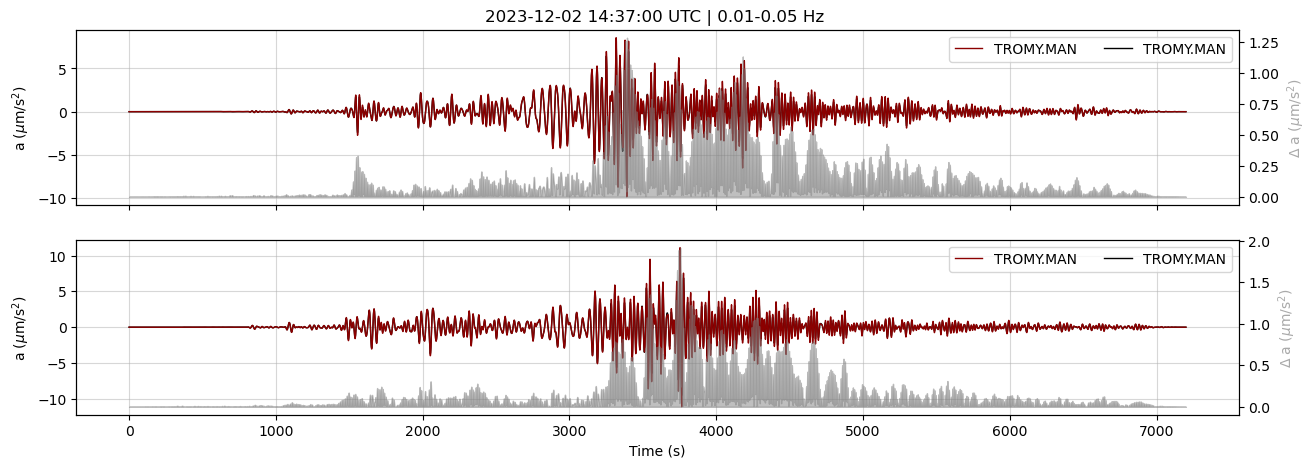

In [11]:
config['fmin'] = 0.01
config['fmax'] = 0.05

st1 = TROMY.copy()
# st1 = BROMY.copy()

st1 = st1.detrend("demean");
st1 = st1.taper(0.1);
st1 = st1.filter("bandpass", freqmin=config['fmin'], freqmax=config['fmax'], corners=4, zerophase=True);


st2 = fur.copy()

s2 = st2.detrend("demean");
s2 = st2.taper(0.1);
s2 = st2.filter("bandpass", freqmin=config['fmin'], freqmax=config['fmax'], corners=4, zerophase=True);


fig = __makeplot_waveform_comparison(st1, st2)

fig.savefig(config['path_to_figs']+f"{st1[0].stats.station}_{st2[0].stats.station}_ {config['tbeg'].date}_waveforms.png", format="png", dpi=150, bbox_inches='tight');


In [12]:
# config['fmin'] = 0.01
# config['fmax'] = 0.05


# st0 = fur.copy()

# st0 = st0.detrend("demean");
# st0 = st0.taper(0.1);
# st0 = st0.filter("bandpass", freqmin=config['fmin'], freqmax=config['fmax'], corners=4, zerophase=True);


# st1 = TROMY.copy()

# st1 = st1.detrend("demean");
# st1 = st1.taper(0.1);
# st1 = st1.filter("bandpass", freqmin=config['fmin'], freqmax=config['fmax'], corners=4, zerophase=True);


# st2 = TROMY2.copy()

# s2 = st2.detrend("demean");
# s2 = st2.taper(0.1);
# s2 = st2.filter("bandpass", freqmin=config['fmin'], freqmax=config['fmax'], corners=4, zerophase=True);

# diff1 = st1[0].data - st0[0].data
# diff2 = st2[0].data - st0[0].data

# plt.plot(diff1-diff2);
# # plt.plot(diff2);